In [43]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [44]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [45]:
Fraud_check = pd.read_csv('Fraud_check.csv')

In [47]:
Fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [48]:
Fraud_check.shape

(600, 6)

In [49]:
Fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [50]:
Fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [51]:
Fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [52]:
Fraud_check.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [53]:
Fraud_check.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [54]:
Fraud_check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### Visualization

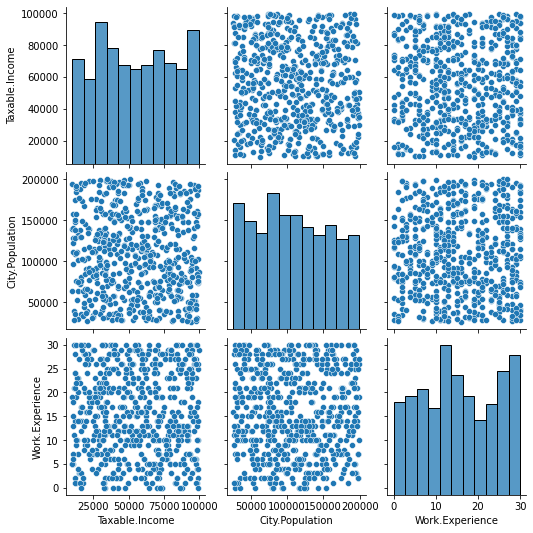

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(Fraud_check)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


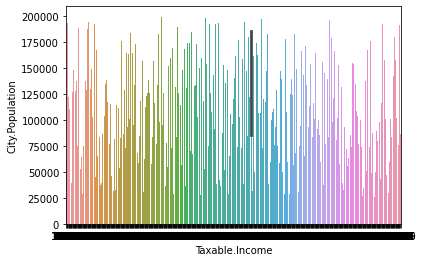

In [56]:
sns.barplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


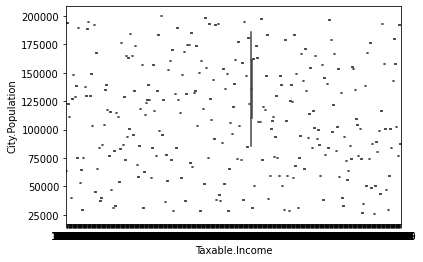

In [57]:
sns.boxplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

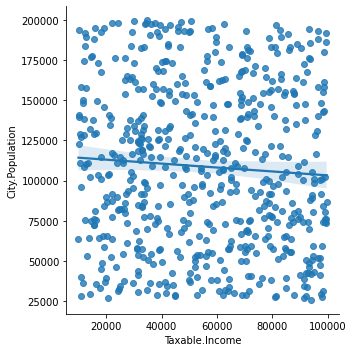

In [58]:
sns.lmplot(x='Taxable.Income',y='City.Population', data=Fraud_check)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


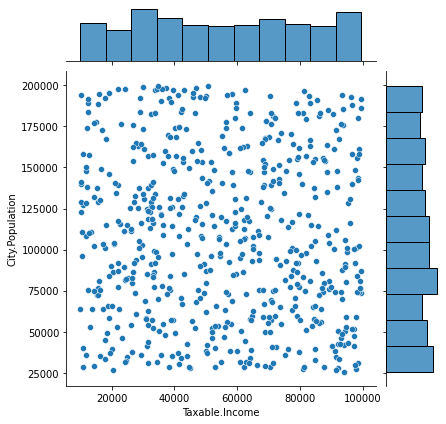

In [59]:
sns.jointplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


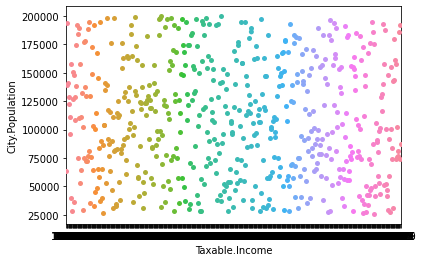

In [60]:
sns.stripplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


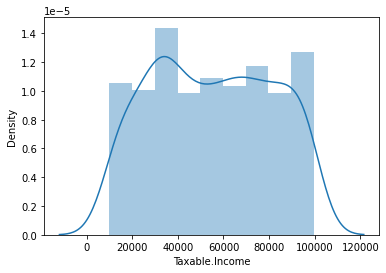

In [61]:
sns.distplot(Fraud_check['Taxable.Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


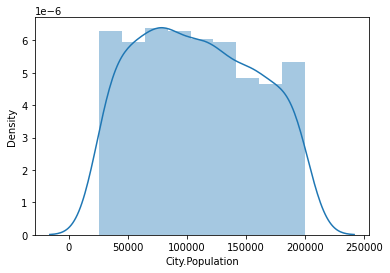

In [62]:
sns.distplot(Fraud_check['City.Population'])

### Data Pre-processing

In [67]:
#creat dummies for comp_data
Fraud_check = pd.get_dummies(Fraud_check, columns = ["Undergrad", "Marital.Status", "Urban"])

In [64]:
#converting continous type to categorical
max = Fraud_check['Taxable.Income'].max()
Fraud_check['Taxable.Income'] = pd.cut(Fraud_check['Taxable.Income'], bins = [-999 , 30000 , 99999] , labels=['Risky' , 'Good'])


In [65]:
Fraud_check['Taxable.Income'].unique()
Fraud_check['Taxable.Income'].value_counts()
colnames = list(Fraud_check.columns)

In [66]:
predictors = colnames[1:]
target = colnames[0]

In [68]:
Fraud_check

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


In [79]:
Fraud_check.isna().sum()

Taxable.Income             0
City.Population            0
Work.Experience            0
Undergrad_NO               0
Undergrad_YES              0
Marital.Status_Divorced    0
Marital.Status_Married     0
Marital.Status_Single      0
Urban_NO                   0
Urban_YES                  0
dtype: int64

In [70]:
x = Fraud_check.iloc[:,1:]
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [72]:
y = Fraud_check.iloc[:,0]
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [73]:
len(y)

600

In [74]:
colnames=list(Fraud_check.columns)
colnames

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [80]:
#Splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## MODEL BUIDLING USING DECISION TREE AND ENTROPY CRITERION

In [81]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [82]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

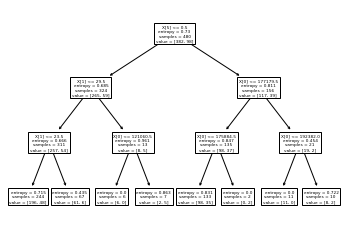

In [83]:
# plot the decision tree
tree.plot_tree(model);

In [85]:
Fraud_check.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

In [86]:
Fraud_check['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

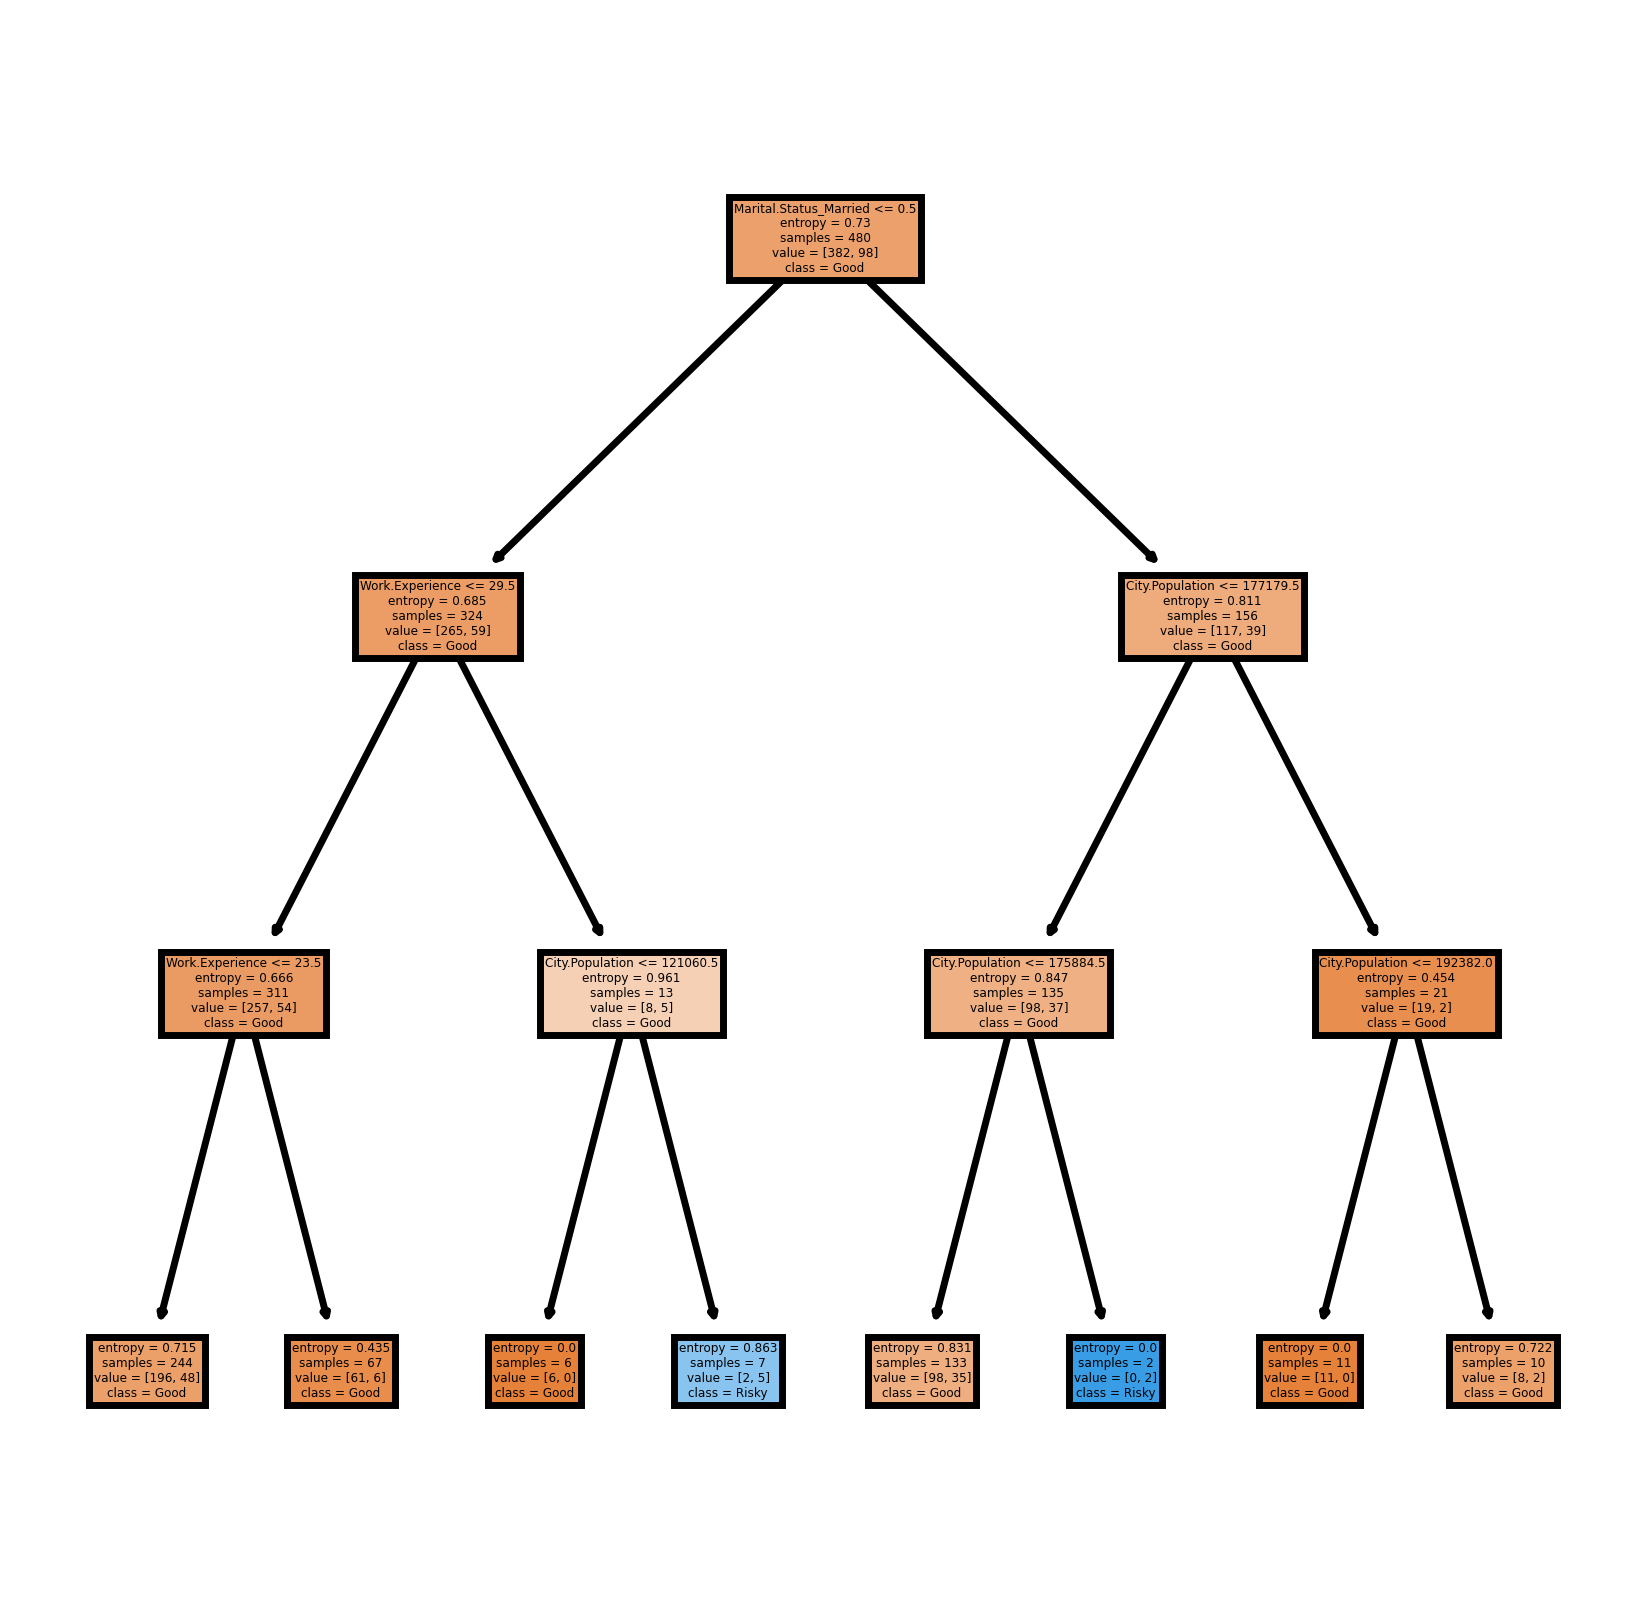

In [87]:
fn=['City.Population','Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES'] #.columns
cn=['Good', 'Risky']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [88]:
# predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Good     119
Risky      1
dtype: int64

In [89]:
y_test.value_counts()

Good     94
Risky    26
Name: Taxable.Income, dtype: int64

In [90]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [91]:
pd.crosstab(y_test,preds)

col_0,Good,Risky
Taxable.Income,,
Risky,26,0
Good,93,1


In [92]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.775

In [93]:
np.mean(preds==y_test)

0.775

In [94]:
#taking max_depth size=4 to check accuracy
model2=DecisionTreeClassifier(criterion='entropy', max_depth=4)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [95]:
# predicting on test data
preds = model2.predict(x_test)
pd.Series(preds).value_counts()

Good    120
dtype: int64

In [96]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.7833333333333333

In [97]:
#taking max_depth size=5 to check accuracy
model3=DecisionTreeClassifier(criterion='entropy', max_depth=5)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [98]:
# predicting on test data
preds = model3.predict(x_test)
pd.Series(preds).value_counts()

Good     119
Risky      1
dtype: int64

In [99]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.775

In [100]:
#taking max_depth size=6 to check accuracy
model4=DecisionTreeClassifier(criterion='entropy', max_depth=6)
model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [101]:
# predicting on test data
preds = model4.predict(x_test)
pd.Series(preds).value_counts()

Good     118
Risky      2
dtype: int64

In [102]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.7833333333333333

In [103]:
#taking max_depth size=7 to check accuracy
model5=DecisionTreeClassifier(criterion='entropy', max_depth=7)
model5.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [104]:
# predicting on test data
preds = model5.predict(x_test)
pd.Series(preds).value_counts()

Good     110
Risky     10
dtype: int64

In [105]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.7166666666666667

Accuracy is better at max_depth = 4

# Building Decision Tree Classifier (CART) using Gini Criteria

In [110]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [111]:
model_gini.get_n_leaves()

13

In [112]:
preds = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good    120
dtype: int64

In [113]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [114]:
# Accuracy 
np.mean(preds==y_test)

0.7833333333333333

In [115]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        Good       1.00      0.78      0.88       120
       Risky       0.00      0.00      0.00         0

    accuracy                           0.78       120
   macro avg       0.50      0.39      0.44       120
weighted avg       1.00      0.78      0.88       120



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
